In [2]:
########################################
# Big Data Analysis & Machine Learning #
#             R Example 1              #
########################################

# Wage dataset
install.packages('ISLR')
library(ISLR)

data(Wage)

package 'ISLR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\roh_kondae\AppData\Local\Temp\RtmpUDNVOg\downloaded_packages


Warning message:
"package 'ISLR' was built under R version 3.6.3"


In [2]:
dim(Wage)     # Dimension of dataset

[1] 3000   11

In [9]:
Wage[1:5,]

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.04315
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.47602
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.98218
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.68529
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.04315


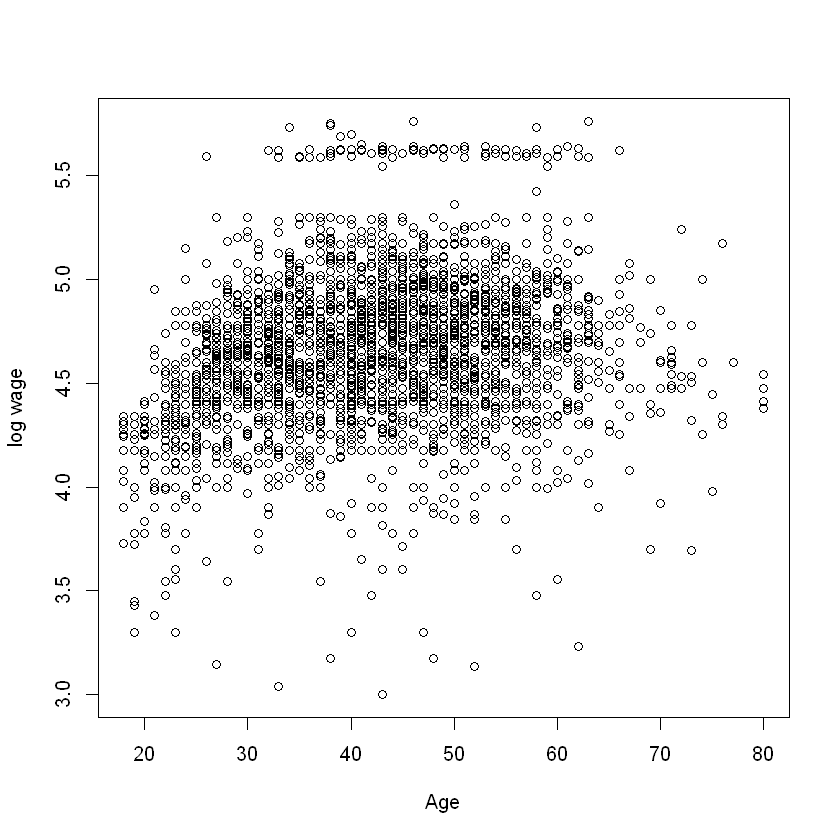

In [12]:
# plot 
# 나이에 따른 임금을 보려고 한다.
# 나이 들수록 올라가다가 더 들면 떨어지는 모양
plot(Wage$age, Wage$logwage, xlab='Age', ylab='log wage')

In [14]:
# Randomly divide into training and testsets.
set.seed(1)

n = nrow(Wage)

# 1:n (1:3000)개 중 200개를 랜덤하게 뽑아라
idx = sample(1:n, size=200)

train = Wage[idx,]
test = Wage[-idx,]

In [19]:
nrow(train)
nrow(test)

[1] 200

[1] 2800

- 랜덤하게 트레이닝셋과 테스트셋으로 나누려고 한다.
- 트레이닝셋은 모델을 세울때 사용하는 데이터셋
- 테스트셋은 모델 셀렉션/이밸류에이션할때 사용
- 가장 낮은 테스트에러 갖는 모델이 좋은 모델
- 랜덤하게 나눠야 한다. 패턴을 갖고 나누면 두 셋의 특성이 달라지게 됨
- set.seed(1) 하면 난수처럼 보이는 난수가 나온다.똑같은 시퀀스의 랜덤넘버를 만들라는 것
- set.seed는 실제로 분석할땐 쓰면 안됨
- nrow는 행의 갯수, observation의 갯수

In [20]:
# Polynomial regression with order d=1,2,3,4.

# Age만 본 단순 모델
M1 = lm(logwage ~ age, data=train)

# Age를 제곱한 항을 X변수에 넣는 것
M2 = lm(logwage ~ age + I(age^2), data=train)

# 3차곡선 모델
M3 = lm(logwage ~ age + I(age^2) + I(age^3), data=train)

# 4차곡선 모델
M4 = lm(logwage ~ age + I(age^2) + I(age^3) + I(age^4), data=train)

- n차곡선으로 올라갈수록 Flexibility가 올라가는 것
- 모델이 점점 복잡해지는 형태
- 4개의 모델에 대해 각각 트레이닝에러/테스트 에러 구할 것

In [21]:
# Compute training and test errors for various models.
# 에러 저장될 공간을 만든다
m = 4     # # of models

train.error = numeric(m)
test.error = numeric(m)

In [29]:
# 반복문을 이용해서 각각 모형의 test error를 계산하려 한다
for (i in 1:m)
{
  model = paste('M',i, sep='') # 모델 이름
  logwage.hat.tr = predict(get(model), newdata=train)
  train.error[i] = sum((train$logwage - logwage.hat.tr)^2) / nrow(train) # MSE
  
  logwage.hat.te = predict(get(model), newdata=test)
  test.error[i] = sum((test$logwage - logwage.hat.te)^2) / nrow(test)
}

In [30]:
train.error

[1] 0.1257206 0.1189840 0.1169699 0.1169626

In [31]:
test.error

[1] 0.1179503 0.1105013 0.1115202 0.1121348

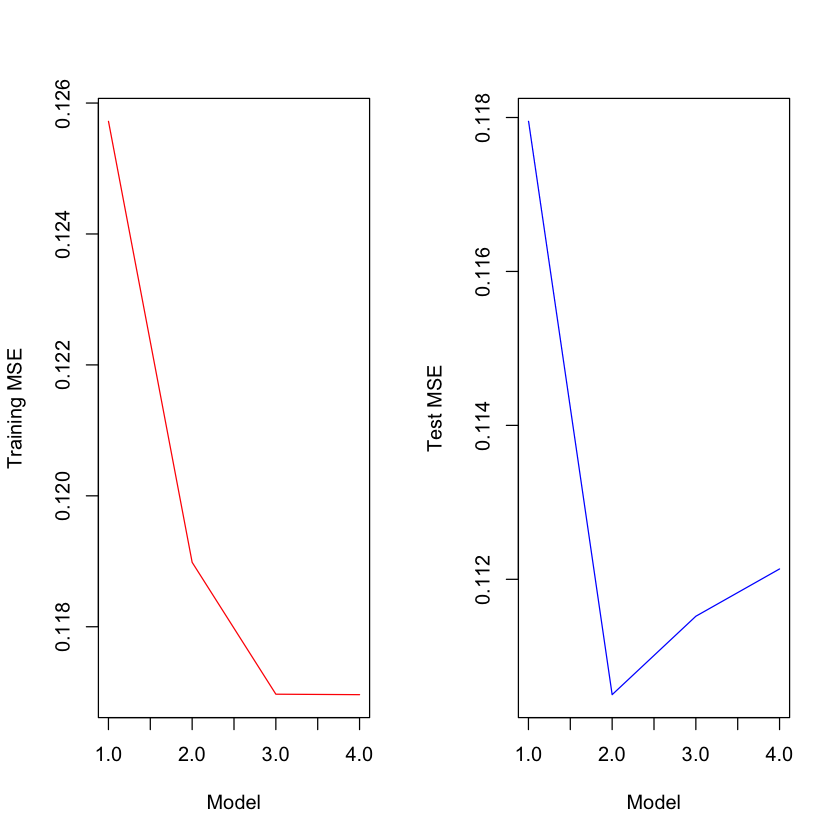

In [8]:
# 22:00 
par(mfrow=c(1,2)) # 그림 두 개를 동시에 그릴 때
plot(1:m, train.error, type='l', col='red',ylab='Training MSE',xlab='Model')
plot(1:m, test.error, type='l', col='blue',ylab='Test MSE',xlab='Model')

- 모형이 복잡해질수록 Training MSE는 줄어든다
- Test 보면 M2가 가장 좋은 모델이다. 가장 낮은 Test MSE 가짐
- 테스트 에러는 떨어졌다 올라가는 패턴. 

- 해석이 중요하다고 하면 이런 파라메트릭한 방법으로 가야함. 2차함수 나오면 맥스값도 볼 수 있음. 
- 올라갔다 내려가는거 보고 해석하는 것 .이 나이 이후로는 평균적으로 임금이 떨어지는군!
- 올라가는 레이트가 어느정도인지는 2차함수에서 계산
- 해석이 중요할땐 위와같은 모델 써야함

- 예측이 중요하다면 넌파라매트릭한 방법을 고민 -> KNN

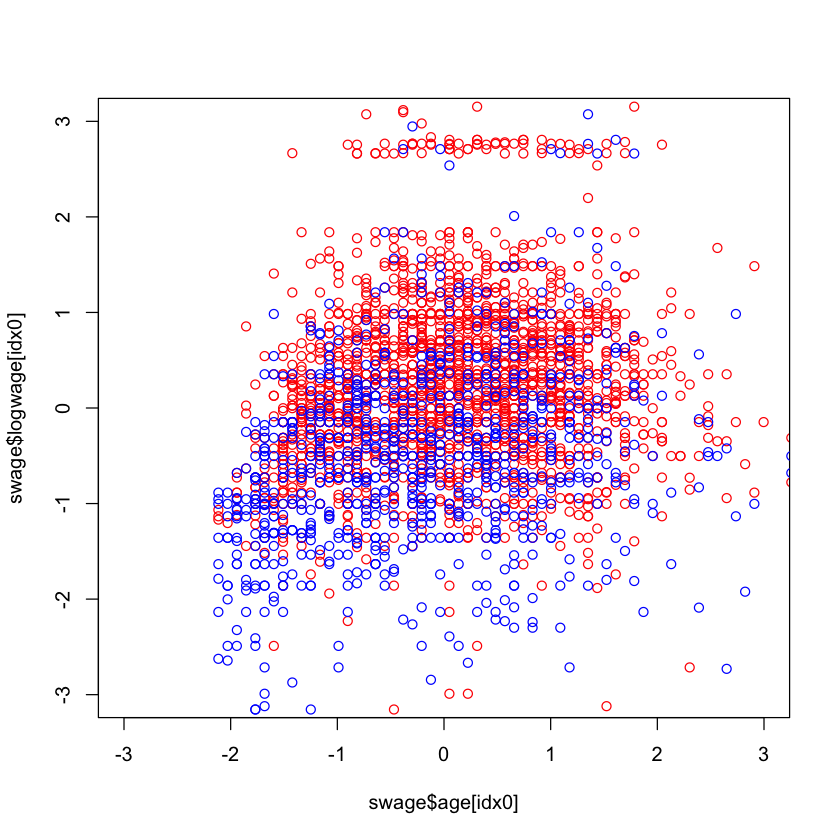

In [9]:
# KNN classifier ---------------------------

# Data

library(class)
# ?knn 30:00 에서 설명

# Standardized inputs
swage = as.data.frame(apply(Wage[,c('age','logwage')],2,scale))


# plot
par(mfrow=c(1,1))

idx0 = which(Wage$health_ins == '1. Yes') # factor object임. (Levels: 1. Yes 2. No)
# table(Wage$health_ins)
plot(swage$age[idx0],swage$logwage[idx0],col='red',ylim=c(-3,3),xlim=c(-3,3))
points(swage$age[-idx0],swage$logwage[-idx0],col='blue')

In [10]:
# Randomly divide into traing and test datasets.
set.seed(1)

idx = sample(1:n, size=200)
Y = as.factor(ifelse(Wage$health_ins == '1. Yes','Y','N'))
tr = swage[idx,]
te = swage[-idx,]

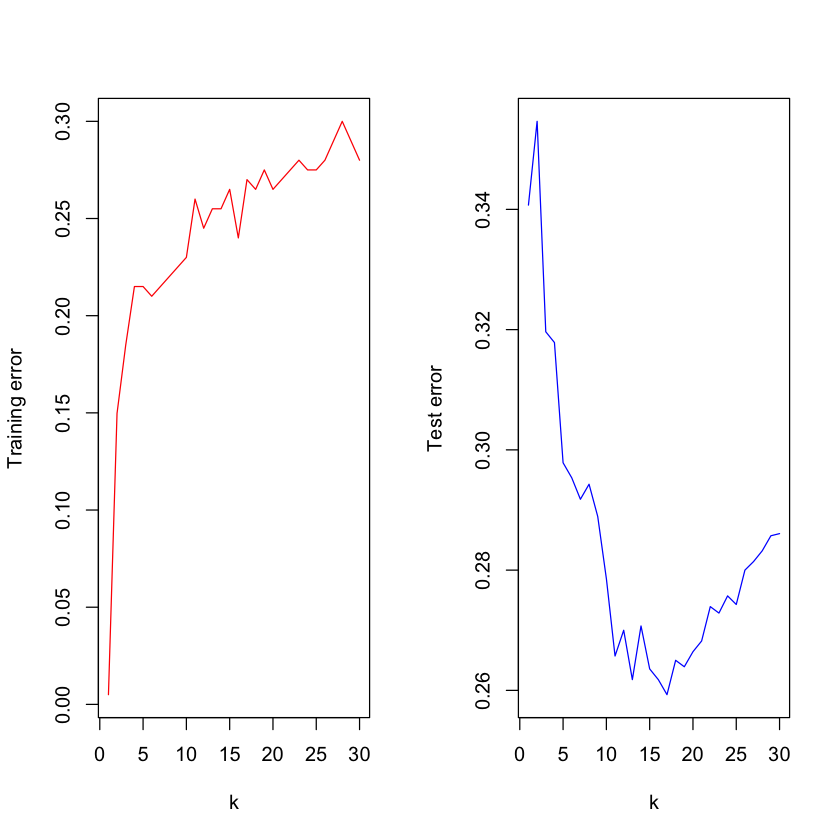

In [11]:
# Compute training and test errors for vairous k values.

m = 30
tr.error = NULL
te.error = NULL
for (k in 1:m)
{
  yhat.tr = knn(tr, tr, cl= Y[idx], k=k)
  tr.error = c(tr.error, sum(yhat.tr != Y[idx]) / nrow(tr))
  
  yhat.te = knn(tr, te, cl= Y[idx], k=k)
  te.error = c(te.error, sum(yhat.te != Y[-idx]) / nrow(te))
}

par(mfrow=c(1,2))
plot(1:m, tr.error, type='l', col='red',xlab='k',ylab='Training error')
plot(1:m, te.error, type='l', col='blue',xlab='k',ylab='Test error')
